### 1 Базовая задача МНК

Теорвопрос 1

$$\mathcal{L}=\sum _{i=1}^{l}(y_{i}-\tilde{y})^{2}\xrightarrow{}\min_{\tilde{y}} $$

$$
\frac{ \partial \mathcal{L} }{ \partial \tilde{y} }=0=-2\sum _{i=1}^{l}(y_{i}-\tilde{y})\implies
$$

$$
\tilde{y}=\frac{y_{1}+\dots+y_{l}}{l}
$$

Теорвопрос 2

Надо доказать, что прямая МНК всегда проходит через точку выборочных средних

В случае прямой:

$$
\mathcal{L} = \sum _{i=1}^{m}(y_{i}-ax_{i}-b)^{2}
$$

$$
\frac{ \partial \mathcal{L} }{ \partial a } =0=-2a\sum _{i=1}^{m}(y_{i}-ax_{i}-b)\implies
$$

$$
\sum _{i}y_{i}=a\sum _{i}x_{i}+mb\implies  \overline{y}=a\overline{x}+b
$$

В случае плоскости:

$$
\mathcal{L} = \sum _{i=1}^{m}(y_{i}-a_{0}-a_{1}x_{i}^{(1)}-\dots-a_{n}x_{i}^{(n)})^{2}
$$

$$
\frac{ \partial \mathcal{L} }{ \partial a_{1} } =0=-2a_{1}\sum _{i=1}^{m}(y_{i}-a_{0}-a_{1}x_{i}^{(1)}-\dots-a_{n}x_{i}^{(n)})\implies
$$

$$
\overline{y}=a_{0}+a_{1}\overline{x^{(1)}}+\dots+a_{n}\overline{x^{(n)}}
$$

Практическое задание

Dataset I:
Дисперсия x: 11.000
Дисперсия y: 4.127
Корреляция: 0.816

Dataset II:
Дисперсия x: 11.000
Дисперсия y: 4.128
Корреляция: 0.816

Dataset III:
Дисперсия x: 11.000
Дисперсия y: 4.123
Корреляция: 0.816

Dataset IV:
Дисперсия x: 11.000
Дисперсия y: 4.123
Корреляция: 0.817



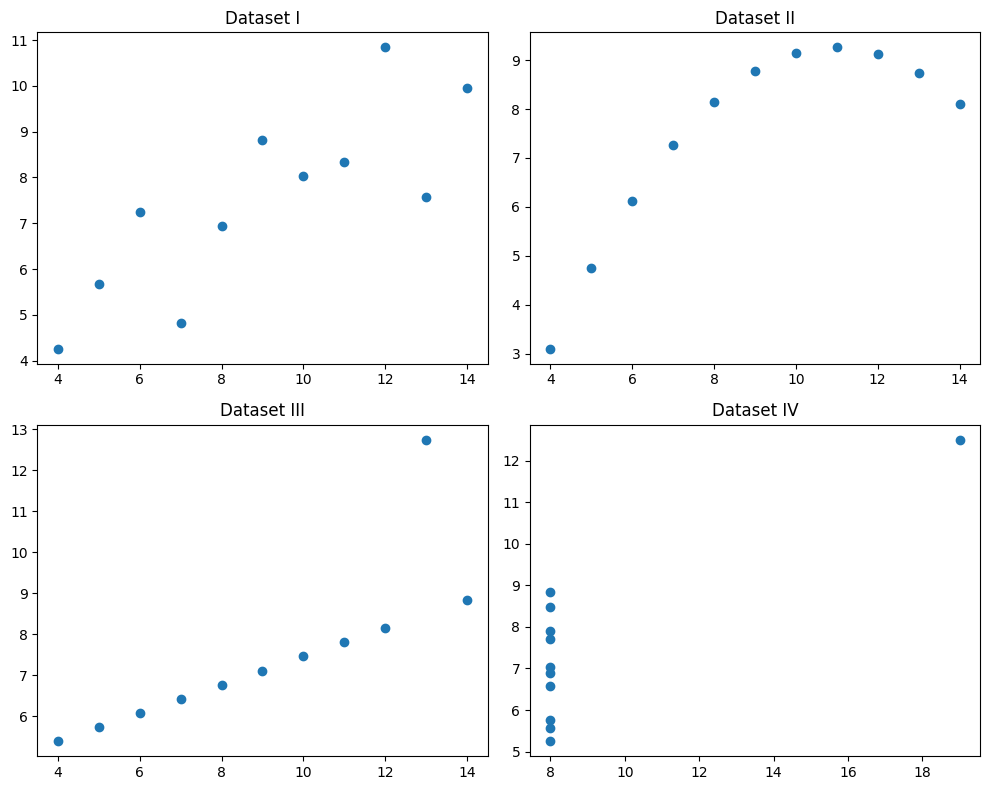

In [1]:
import seaborn as sns
import pandas as pd

anscombe = sns.load_dataset('anscombe')

for dataset in ['I', 'II', 'III', 'IV']:
    df = anscombe[anscombe['dataset'] == dataset]
    x_var = df['x'].var()
    y_var = df['y'].var()
    corr = df['x'].corr(df['y'])
    print(f'Dataset {dataset}:')
    print(f'Дисперсия x: {x_var:.3f}')
    print(f'Дисперсия y: {y_var:.3f}')
    print(f'Корреляция: {corr:.3f}\n')

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    df = anscombe[anscombe['dataset'] == dataset]
    row = i // 2
    col = i % 2
    axes[row, col].scatter(df['x'], df['y'])
    axes[row, col].set_title(f'Dataset {dataset}')
plt.tight_layout()
plt.show()

### 3 Геометрический смысл псевдообратной матрицы

Записанное полностью в матрицах решение выразится так:

$$
\mathcal{L}(w,\lambda)=\frac{1}{2}\lvert \lvert w \rvert  \rvert _{2}^{2}+\lambda^{T}(Xw-y)
$$

$$
\frac{ \partial \mathcal{L} }{ \partial w } =w+X^{T}\lambda=0\implies
$$

$$
w=-X^{T}\lambda
$$

$$
Xw=y\implies -X(X^{T}\lambda)=y
$$

Дальше, в силу того, что у $X$ полный строчный ранг, $XX^{T}$ невырождена и можем тогда решить систему относительно $\lambda$

$$
\lambda=-(XX^{T})y\implies w=X^{T}(XX^{T})^{-1}
$$

### 4 Матрица объект-признак

Теоретическое задание 1

$$
X=V\sqrt{ \Lambda }U^{T}
$$

$$
\Lambda=diag(\lambda _{1},\dots,\lambda _{F})
$$

$$
\tilde{\Lambda}=diag(\lambda _{1},\dots,\lambda _{\tilde{F}},0,\dots,0)
$$

$$
\tilde{X}=V\sqrt{ \tilde{\Lambda} }U^{T}
$$

Ошибка

$$
E=X-\tilde{X}=V(\sqrt{ \Lambda }-\sqrt{ \tilde{\Lambda} })U^{T}
$$

Умножение на унитарные матрицы не меняет норму Фробениуса

$$
\lvert \lvert E \rvert  \rvert _{F}^{2}=\lvert \lvert \sqrt{ \Lambda }-\sqrt{ \tilde{\Lambda} } \rvert  \rvert _{F}^{2}=
$$

$$
\lvert \lvert E \rvert  \rvert _{F}^{2}=\sum _{i=\tilde{F}+1}^{F}(\sqrt{ \lambda _{i} })^{2}=\sum _{i=\tilde{F}+1}^{F}\lambda _{i}
$$

Теоретическое задание 2

Из возможности выбора ортонормированностых левых сингулярных векторов из тождества

$$
Xu_{i}=\sigma _{i}v_{i}
$$

Следует, что

$$
\max_{\lvert \lvert u \rvert  \rvert =1}(Xu)^{2}=\sigma _{max}^{2}, ((v,v)=(v,Xu)=(X^{*}v,u)=(u,u))\implies 
$$

$$
u=\arg\max_{\lvert \lvert u \rvert  \rvert =1}(Xu)^{2}
$$

Практическое задание

/tmp/ipykernel_36857/3709070176.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(np.zeros(3), cov, size=N)


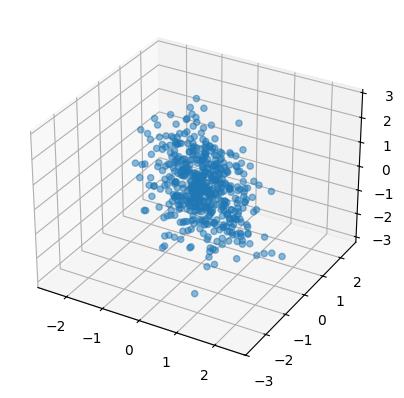

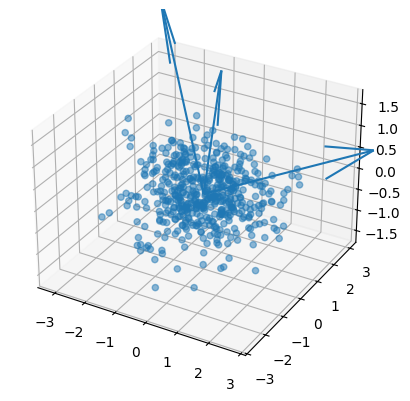

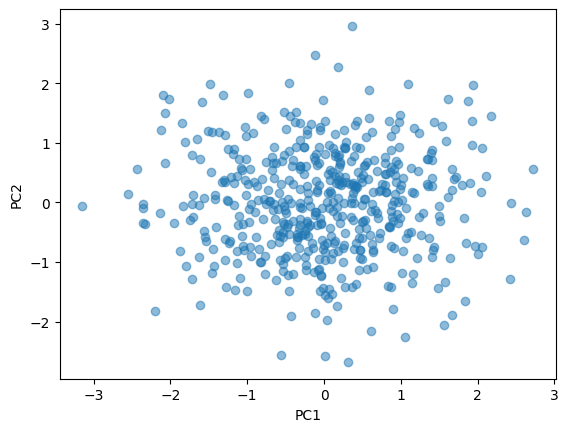

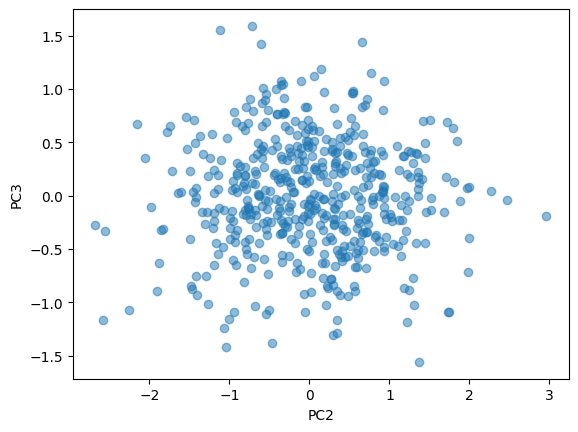

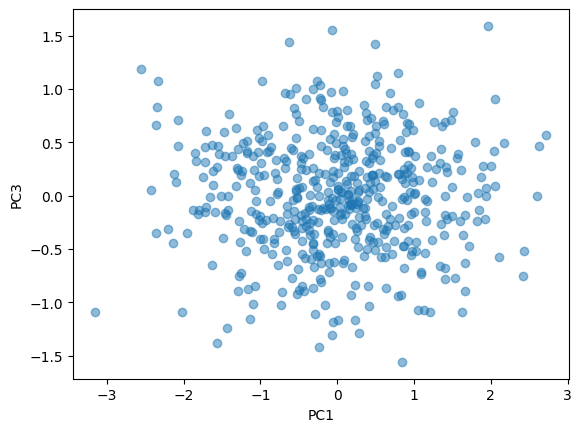

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

np.random.seed(0)
A = np.random.randn(3,3)
A = (A + A.T)/2
N = 500
cov = np.linalg.inv(A)
X = np.random.multivariate_normal(np.zeros(3), cov, size=N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.5)
plt.show()

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], alpha=0.5)
for vec in pca.components_:
    ax.quiver(0,0,0,vec[0],vec[1],vec[2], length=5)
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.scatter(X_pca[:,1], X_pca[:,2], alpha=0.5)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,2], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()


### 5 Геометрический смысл сингулярного разложения